# Polynomial Regression to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei, optimal degree is 2.
- Ex-hubei, optimal degree is 3.

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2022-10-20 09:01:52Update records successfully to ../data/DXY_Chinese.csvCPU times: total: 31.2 ms
Wall time: 18.1 s

Save area daily dataset (English) into ../data/DXYArea.csv


In [3]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
#df = df[df['date'] < datetime.datetime(2020, 2, 10)]

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
10062,2022-10-19,中国,CN,台湾省,NaN,7257592,0,13742,11994,1046,7231856
10063,2022-10-19,中国,CN,香港特别行政区,NaN,425913,0,88586,10285,1046,327042
10064,2022-10-19,中国,CN,澳门特别行政区,NaN,793,0,787,6,1046,0


### EDA

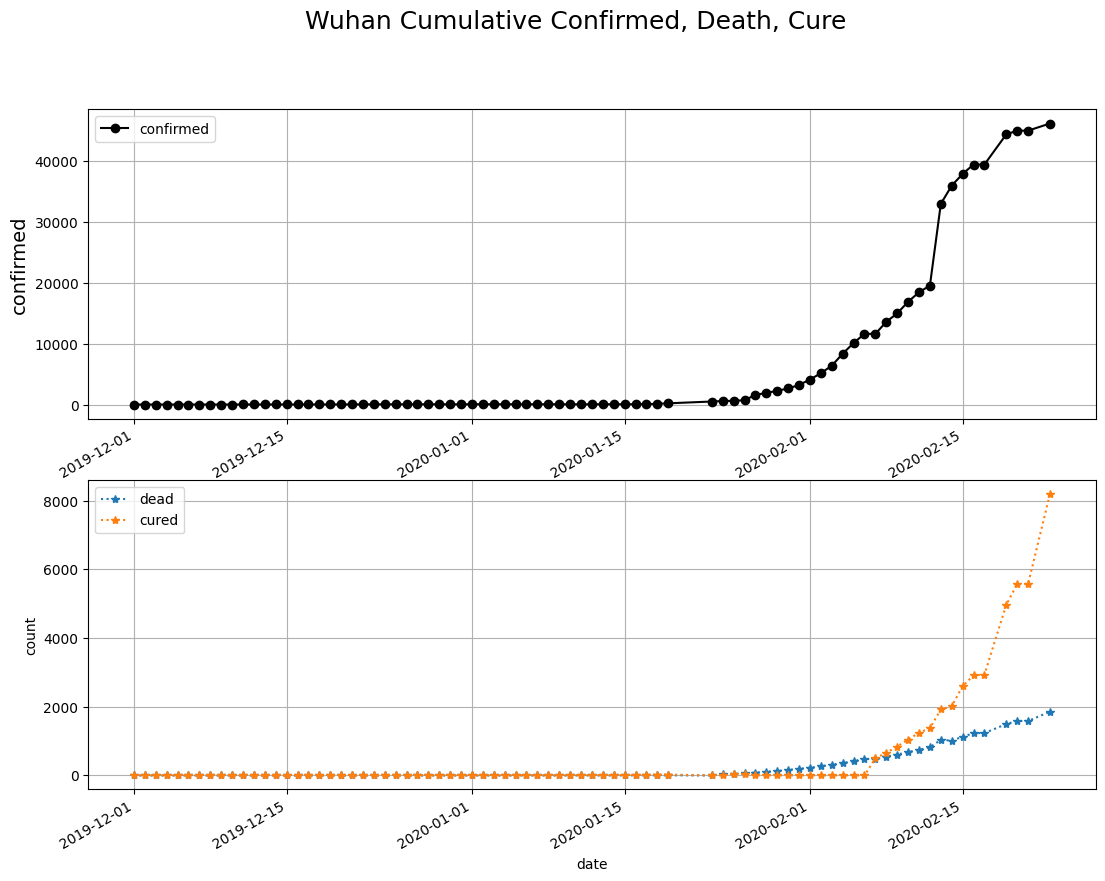

In [4]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

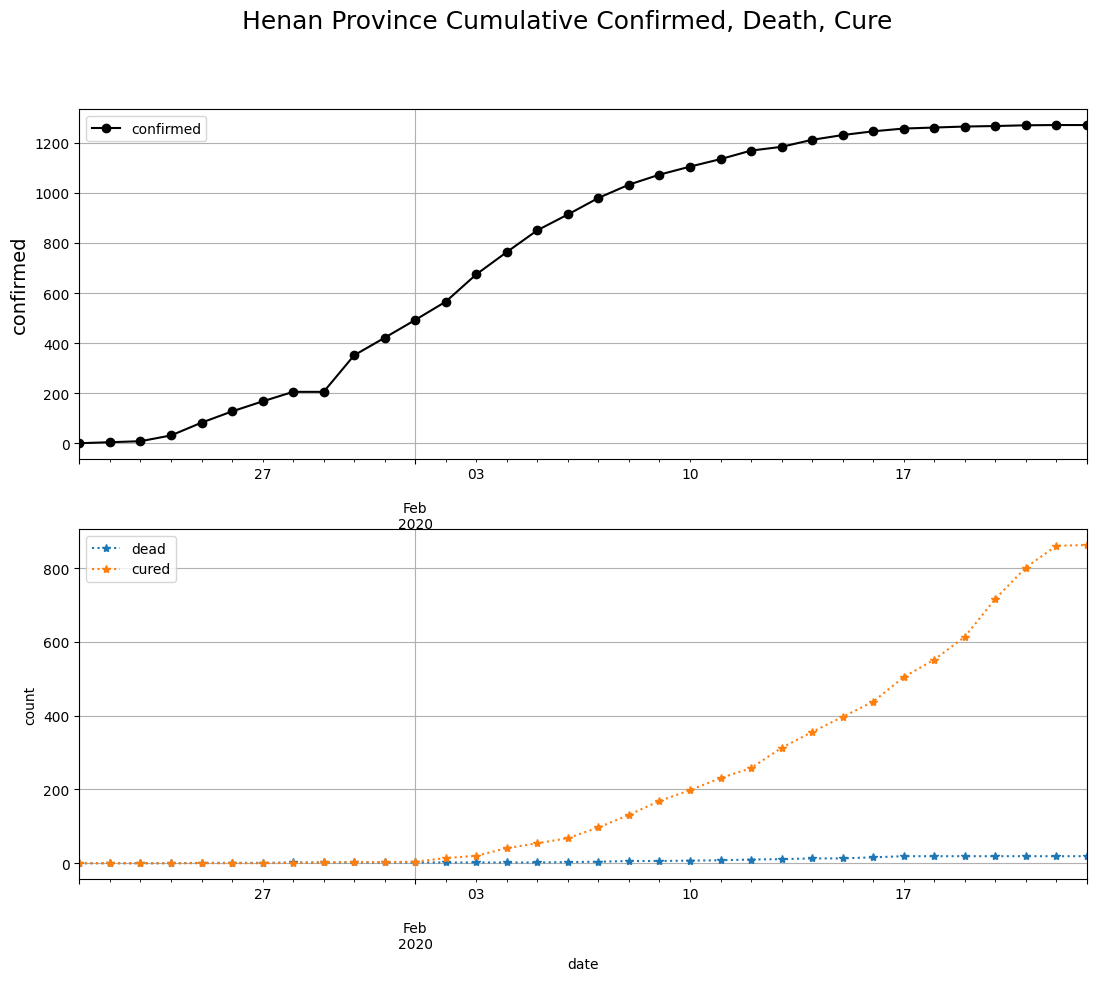

In [5]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [6]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total, 5)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2022-10-14 00:00:00 
Test dataset: the last 5 days


In [7]:
China_total.tail(2)

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
10029,2022-10-18,中国,CN,NaN,NaN,7940813,5,350092,27511,1045,7563210
10030,2022-10-19,中国,CN,NaN,NaN,7940813,5,350092,27511,1046,7563210


Degree 1:
RMSE of training set is 202058.72838434356
R2 score of training set is 0.9966574143955514
MAPE of training set is 117.75100886593818

RMSE of test set is 651208.0301047569
R2 score of test set is -118.83646444890458
MAPE of test set is 0.08244598440379115
---------------------------------------

Degree 3:
RMSE of training set is 9892.645079100921
R2 score of training set is 0.9999919877929531
MAPE of training set is 21.087430233033302

RMSE of test set is 23529.77335652092
R2 score of test set is 0.8435466088466115
MAPE of test set is 0.002216680008728819
---------------------------------------

Degree 2:
RMSE of training set is 145826.99028927766
R2 score of training set is 0.9982589825161127
MAPE of training set is 168.16972902699067

RMSE of test set is 408239.3954939234
R2 score of test set is -46.09548974696069
MAPE of test set is 0.051732359168531174
---------------------------------------



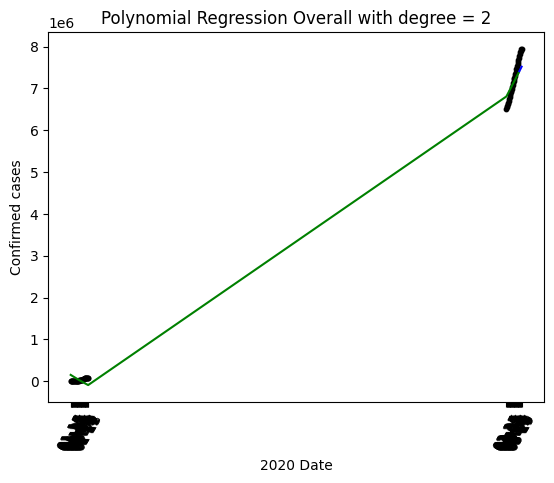

In [8]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 169113.84794862947
R2 score of training set is 0.9977976543274725
MAPE of training set is 231.2452811525999

---------------------------------------



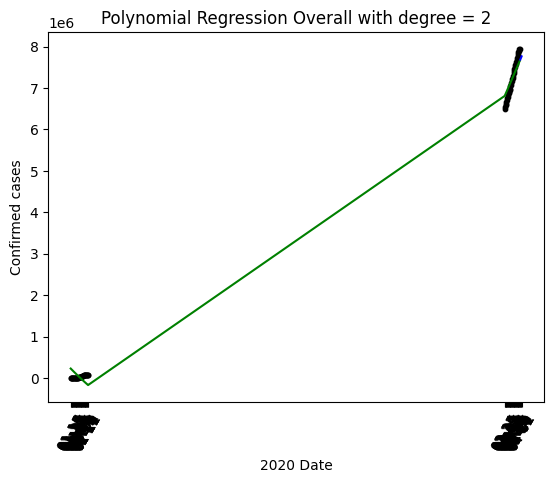

In [9]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-18 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 7876.703802734905
R2 score of training set is 0.8450209303087817
MAPE of training set is 26.19305416455656

RMSE of test set is 8455.014750999906
R2 score of test set is -94.83148142806193
MAPE of test set is 0.1290645950344872
---------------------------------------

Degree 3:
RMSE of training set is 2066.292949378205
R2 score of training set is 0.989334829365334
MAPE of training set is 2.0958411670436616

RMSE of test set is 22829.67804644553
R2 score of test set is -697.6811661362732
MAPE of test set is 0.32950677078393853
---------------------------------------

Degree 2:
RMSE of training set is 2088.739567871104
R2 score of training set is 0.9891018543372135
MAPE of training set is 3.070920014590157

RMSE of test set is 20750.321132520054
R2 score of test set is -576.2037009637805
MAPE of test set is 0.2987699852283114
---------------------------------------



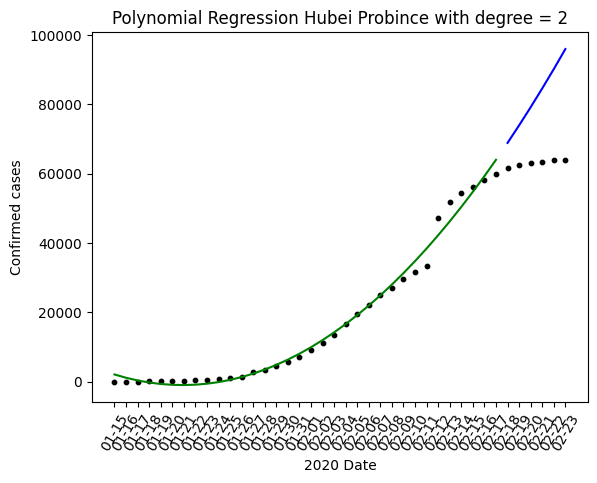


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 4648.457713479542
R2 score of training set is 0.9643220249187133
MAPE of training set is 4.917653448181299

---------------------------------------



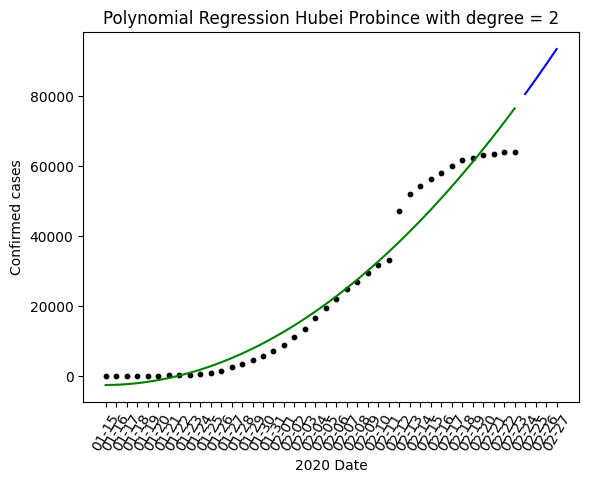

In [10]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Hubei Probince", Hubei)

### Case3: Ex-hubei Province

            date country countryCode        province   city  confirmed  \
135   2020-01-15      中国          CN             NaN    NaN         41   
136   2020-01-15      中国          CN  Hubei Province    NaN         41   
137   2020-01-15      中国          CN  Hubei Province  Wuhan         41   
138   2020-01-16      中国          CN             NaN    NaN         45   
139   2020-01-16      中国          CN  Hubei Province    NaN         45   
...          ...     ...         ...             ...    ...        ...   
10060 2022-10-19      中国          CN         宁夏回族自治区    NaN        215   
10061 2022-10-19      中国          CN        新疆维吾尔自治区    NaN       1621   
10062 2022-10-19      中国          CN             台湾省    NaN    7257592   
10063 2022-10-19      中国          CN         香港特别行政区    NaN     425913   
10064 2022-10-19      中国          CN         澳门特别行政区    NaN        793   

       suspected  cured   dead  Days  net_confirmed      R        I  E  
135            0     12      2    38  

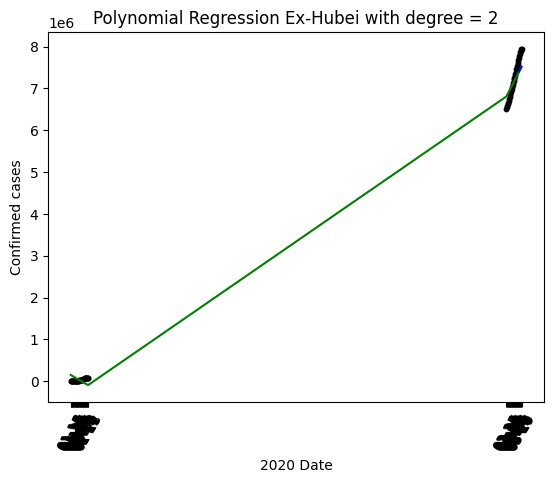

Degree 4:
RMSE of training set is 5682.010266123074
R2 score of training set is 0.9999973567920276
MAPE of training set is 3.238630405147935

RMSE of test set is 35878.702635569694
R2 score of test set is 0.6362332881862067
MAPE of test set is 0.003021000178525423
---------------------------------------

Degree 5:
RMSE of training set is 5633.2100345040835
R2 score of training set is 0.999997401999706
MAPE of training set is 3.8912166524069938

RMSE of test set is 39224.43955531714
R2 score of test set is 0.5652265784072128
MAPE of test set is 0.003402571622975347
---------------------------------------


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 169113.84794862947
R2 score of training set is 0.9977976543274725
MAPE of training set is 231.2452811525999

---------------------------------------



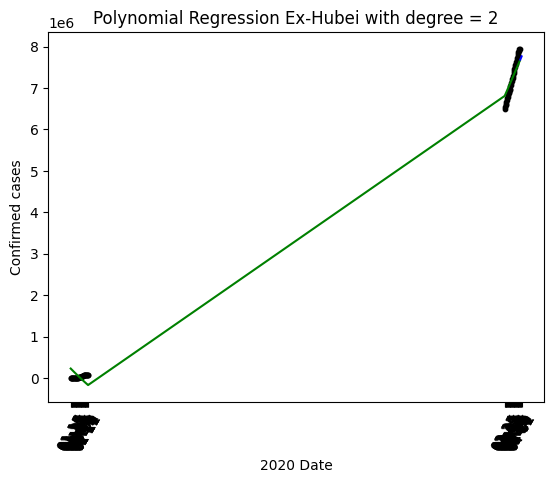

In [11]:
# NotHubei = get_China_exclude_province(China_df, "Hubei Province")
# print(China_df)
# China_data = China_df
# China_df['R'] = China_df['cured'] + China_df['dead']
# SIR_data = China_df[['date', 'Days', 'countryCode','province', 'city', 'net_confirmed', 'suspected', 'R', 
#               ]].rename(columns={"net_confirmed": "I", "suspected": "E"})

# NotHubei = get_China_exclude_province(SIR_data, "Hubei Province")

# print(NotHubei)
# X_train, X_test, y_train, y_test = data_processing(China_data, 5)

China_df['R'] = China_df['cured'] + China_df['dead']
China_df['I'] = China_df['net_confirmed']
China_df['E'] = China_df['suspected']
print(China_df)

NotHubei = get_China_exclude_province(China_df, "Hubei Province")


X_train, X_test, y_train, y_test = data_processing(NotHubei, 5)   

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(4, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(5, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)